In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import matplotlib as mpl
import matplotlib.ticker as mticker
import plotly.offline as pyo
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data = pd.read_csv('Imports_Exports_Dataset new.csv')

In [3]:
data

Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                Port     Category  \
0            Export             Air          Robertbury    Machinery   
1            Export             Air            Shahport     Clothing   
2            Export             Air            Adamfort    Furniture   
3            Export             Air           Juliebury  Electronics   
4            Export             Sea        East Randall    Machinery   
...             ...             ...                 ...          ...   
14995        Import            Land           Henryberg  Electronics   
14996        Import             Air           Tracyview    Furniture   
14997        Import             Sea     North Juliatown  Electronics   
14998        Import            Land  North Kathleentown     Clothing   
14999        Import             Air           West Gary     Clothing   

       Quantity    Value        Date  Customs_Code   Weight  
0          1979  9506.57  07-12-2023        620537  4248.65  
1          5763  7100.91  04-04-2023        927600  4340.81  
2          2592  7226.42  09-05-2022        996084  4886.14  
3          2622  2817.29  03-04-2023        555981  4406.74  
4          6975   657.80  23-07-2021        741778  1497.16  
...         ...      ...         ...           ...      ...  
14995      3115  9263.96  07-05-2022        570345   541.97  
14996      2885  4114.55  20-02-2023        946363  2147.70  
14997      7090  9043.26  01-06-2020        282403  3300.82  
14998      2016  4572.23  07-11-2020        855213  2559.71  
14999      5635   561.33  25-12-2019        766709  2913.82  

[15000 rows x 12 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Shipping_Method  15000 non-null  object 
 5   Port             15000 non-null  object 
 6   Category         15000 non-null  object 
 7   Quantity         15000 non-null  int64  
 8   Value            15000 non-null  float64
 9   Date             15000 non-null  object 
 10  Customs_Code     15000 non-null  int64  
 11  Weight           15000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ MB


### Transformando o date de Object para Datetime

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction_ID   15000 non-null  object        
 1   Country          15000 non-null  object        
 2   Product          15000 non-null  object        
 3   Import_Export    15000 non-null  object        
 4   Shipping_Method  15000 non-null  object        
 5   Port             15000 non-null  object        
 6   Category         15000 non-null  object        
 7   Quantity         15000 non-null  int64         
 8   Value            15000 non-null  float64       
 9   Date             15000 non-null  datetime64[ns]
 10  Customs_Code     15000 non-null  int64         
 11  Weight           15000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 1.4+ MB


### Quais são as categorias mais importadas no Brasil?

Nessa etapa, será analisada as categorias (produtos) que são mais importadas no Brasil

In [7]:
data_brazil_imports = data.query('Country == "Brazil" and Import_Export == "Import"')
data_brazil_imports.shape

(29, 12)

In [8]:
data_brazil_imports

Transaction_ID Country   Product Import_Export  \
7494   4d6b234f-dfa7-46ed-b2d1-f81ba636425c  Brazil     radio        Import   
7590   322f1499-e8a5-4f31-ac2c-10d0c15648ff  Brazil     maybe        Import   
7687   c9d0a7f4-0042-4fc6-ab87-71dffccae6b8  Brazil       add        Import   
8003   c9d9db15-7efa-4e99-8204-5f8c3a72a669  Brazil    author        Import   
8132   be169d6b-f290-4831-852d-143c23a61526  Brazil        by        Import   
8424   9993bdd7-7e63-404b-b190-3287d756df58  Brazil     child        Import   
8601   f98408a6-0ec0-43b6-b776-0e5d41800953  Brazil      song        Import   
9039   3cd17950-81d1-496a-9f59-5c7cbf35cf4b  Brazil      tree        Import   
9118   088affd2-f3f8-46ad-985c-7b8c67b340cf  Brazil  specific        Import   
9492   3b14236a-4bdd-495c-8099-319c3fdd0411  Brazil     since        Import   
9770   ad2a5d17-5f39-46a7-806e-8bcd0fab981f  Brazil     level        Import   
11111  8c0f36bb-b920-43af-8721-1633d9f08e40  Brazil   discuss        Import   
11229  28906ecc-8a63-4c7e-a62d-ab338a428595  Brazil    season        Import   
11452  74ca0aa8-184e-4de5-af61-49e4634d1325  Brazil  Congress        Import   
11723  4c9455c3-e9d1-49ed-994a-b08d54f41e7c  Brazil      help        Import   
11860  b009fffe-4174-42bf-9a9e-92288aae43af  Brazil     place        Import   
12013  bd132d80-a915-490f-9ac8-595c1589043b  Brazil     serve        Import   
12329  d873ebcb-fbc4-41d0-82ee-8c58ecea7b07  Brazil       two        Import   
12667  8653ef18-0596-4f35-a024-31b627e61fce  Brazil       him        Import   
12779  f9661a79-1835-45f1-84f4-b9dbfe38a399  Brazil  daughter        Import   
12817  e3052862-c7c0-483a-ab5a-0e9ff2fa4f77  Brazil      look        Import   
13154  f57d72df-6bb4-45ea-a1c1-ecac71c5d7a5  Brazil  marriage        Import   
13434  4e273741-8e8d-4c4e-ac18-3292336afa90  Brazil      game        Import   
13438  d385d868-f35a-4f81-8908-984b9f6d6e4b  Brazil    relate        Import   
14070  79ebce91-9a25-471a-b732-b5fc3f7b7826  Brazil      drop        Import   
14455  a5993a46-8009-4023-a2e9-35d2ae0414f9  Brazil    simply        Import   
14551  5f4f2768-cd1e-4c0f-90f7-b9256ff0e694  Brazil       car        Import   
14554  4dc916a2-4dda-4499-b750-ff8e5d57d4d5  Brazil       arm        Import   
14698  7d4cde31-8943-4bb0-abba-fac6acbb7851  Brazil    camera        Import   

      Shipping_Method                Port     Category  Quantity    Value  \
7494              Sea         Millerville         Toys      9164  3895.79   
7590              Sea         Matthewside    Furniture      2898  1882.49   
7687              Sea          Millerbury         Toys      9133  5542.74   
8003              Sea   West Melissamouth    Machinery      3163  1105.22   
8132             Land           Johnmouth     Clothing      8679  6374.78   
8424             Land      Jacquelineview     Clothing      2191  1056.79   
8601             Land  New Phillipchester    Machinery      2086  1550.18   
9039              Air           Terriland     Clothing      3563  5930.41   
9118              Air     New Nathanville  Electronics      9342  8805.75   
9492              Sea      Port Joshuaton    Machinery      7574  7406.86   
9770              Air      Alexandrialand  Electronics      3135  5232.61   
11111             Air          Grahamstad    Furniture      4426  2567.26   
11229             Air         East Daniel    Machinery      8587  1580.02   
11452             Air         North Jamie    Furniture      7051  3161.77   
11723             Air      East Elizabeth     Clothing      5162  4765.79   
11860             Sea        Matthewhaven    Machinery      6753  8709.81   
12013             Sea    West Deborahview  Electronics      9988  8513.62   
12329             Air     West Robertland    Furniture      4477  7540.28   
12667            Land        Johnsonmouth    Machinery      8952  9777.15   
12779             Air         Yolandastad         Toys      5301  2088.56   
12817             Sea         Michealland

In [9]:
data_soma_category = data_brazil_imports.Category.value_counts()
new_data_soma_category = data_soma_category.reset_index()
new_data_soma_category.rename(columns={'Category': 'Categoria', 'count': 'Total'})

Categoria  Total
0    Machinery      7
1     Clothing      7
2  Electronics      6
3         Toys      5
4    Furniture      4

Um gráfico que gera um total de importações por categorias dentro do Brasil

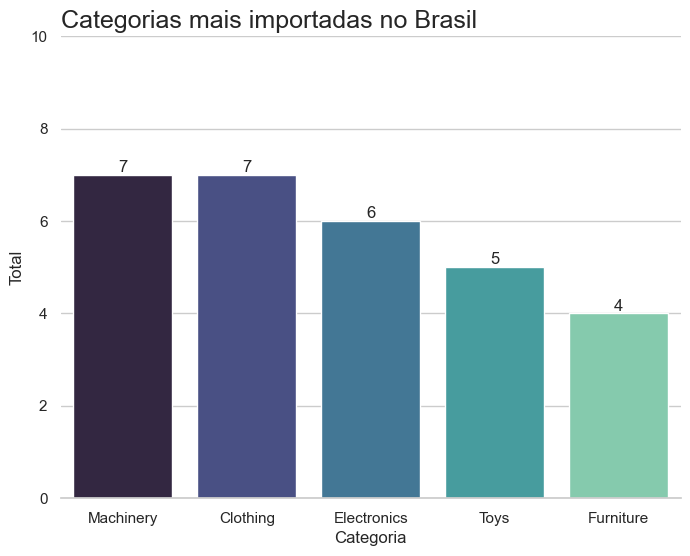

In [10]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 6))

f = sns.barplot(data = new_data_soma_category, x = 'Category', y = 'count', palette='mako', ax=ax, hue='Category')

ax.set_xlabel("Categoria")
ax.set_ylabel("Total")
ax.set_title('Categorias mais importadas no Brasil', fontsize=18, loc='left')

ax.set_ylim(0, 10)

# Adicionando rótulos nas barras
for container in ax.containers:
    ax.bar_label(container)
    
sns.despine(left=True, right=True)

plt.savefig('graficos/categorias_mais_importadas_brasil.png')

plt.show()

O gráfico acima mostra quais são as categorias mais importadas no Brasil, é possível perceber que máquina e roupas são os produtos mais importados, como também eletrônicos. O que condiz com a realidade, já que esses produtos são mais baratos internacionalmente do que nacionalmente.

### Quais são os produtos mais exportados pelo Brasil?

Nesta próxima etapa, será mostrado as categorias (produtos) mais exportados pelo Brasil

In [11]:
data_brazil_export = data.query('Country == "Brazil" and Import_Export == "Export"')
data_brazil_export

Transaction_ID Country      Product Import_Export  \
409   d46e34aa-ae9d-4797-8284-e0bee33e270a  Brazil       chance        Export   
702   a0641fcb-14ab-44d2-a147-c6f582ee1d86  Brazil       memory        Export   
1852  431d779a-dec3-4099-9ca7-b806649ddd51  Brazil      central        Export   
2000  8cf69636-411b-44f7-b5dc-436b65859df3  Brazil   government        Export   
2195  15152e75-e7c1-46a8-bc65-3fdbe7f89277  Brazil      compare        Export   
2328  1493c30f-de9a-48b8-a40b-bb28c322b4ff  Brazil        chair        Export   
2529  108e0777-95b7-4925-a86c-deaf9dc701aa  Brazil  significant        Export   
2825  a7636150-3554-4e70-bd94-0478bbb68059  Brazil         when        Export   
2957  b6c7e6ce-55ed-44fd-9f93-ae90ae05642e  Brazil     politics        Export   
3021  5ee64430-5be5-4099-b397-d0dc9948bfcc  Brazil         have        Export   
3144  420ad025-c989-41b5-813d-0d40e8d36aed  Brazil        above        Export   
3196  bea6b6a8-656d-4178-85fb-d22707e5326e  Brazil        visit        Export   
3347  ebfc0256-aab1-47c6-acd8-66053d3b57b9  Brazil        first        Export   
3352  d5b8e9c1-3453-43c0-9041-7a1e2d16e0c2  Brazil        share        Export   
3583  91f2cc2a-ff94-41a1-b86e-8e830c8a4413  Brazil          set        Export   
3939  eeaa7008-6e1b-4f49-b8f5-3b4df4efb265  Brazil     standard        Export   
3988  75879aa7-0ab3-4afa-aed3-1f3e1f24e0f4  Brazil       member        Export   
4122  71517581-7603-42c9-9f93-63c5478f11db  Brazil         test        Export   
4962  26b800f9-302a-4945-9b42-ff31a4e85121  Brazil       beyond        Export   
4985  13030812-68dd-42d2-a464-6e43e21c7160  Brazil         full        Export   
5045  d9986ecd-24db-4c90-840f-6d223321f62d  Brazil         kind        Export   
5276  7fa65c67-dfdf-442f-8527-da9d0576df50  Brazil    sometimes        Export   
5395  0b85a667-f201-4fd7-9392-8f8844ec57c3  Brazil       effect        Export   
5786  4f652bbd-9a25-4083-b7d6-630bd9093195  Brazil         rate        Export   
5996  73aa278a-20c8-4df3-a304-441e1027d5b8  Brazil        place        Export   
6105  52e3a58e-9677-47ba-9064-c2e0491cc14d  Brazil       matter        Export   
6460  d69e5cf1-fbc0-4ff7-b505-ab59e502f052  Brazil       simple        Export   
6821  0f6a913f-c412-4a9b-ad41-83f85f5764ff  Brazil       better        Export   
7253  6a65c042-92e6-4e75-bdda-d8e3ff6ef041  Brazil         give        Export   
7355  0d093b07-6387-41a8-9cc5-e7bd7dd834b2  Brazil        owner        Export   

     Shipping_Method               Port     Category  Quantity    Value  \
409              Air         Rogersside         Toys      2680  3825.71   
702             Land       Campbellside         Toys      5645  8936.31   
1852             Sea    North Meganfort     Clothing      6375  8913.50   
2000             Air     South Lynnberg    Machinery      6559   661.84   
2195            Land      South Amystad  Electronics      9154  4828.13   
2328             Sea       Crawfordberg    Machinery      9424  1337.67   
2529             Air       West Beverly    Furniture      9756  2659.75   
2825             Air    Port Susanville     Clothing      8489  5345.39   
2957             Air         Sharonport  Electronics      9772  4654.24   
3021             Sea   East Philipmouth     Clothing      3331  7101.77   
3144            Land           Bethbury  Electronics      9269   789.40   
3196             Sea      South Michael  Electronics      6279  7243.38   
3347             Sea      North Caitlin    Machinery      4671  6955.22   
3352            Land      Harperchester     Clothing       210   933.34   
3583             Air        Port Dustin  Electronics      9010  8453.22   
3939             Air        West Lonnie    Machinery      3273  9668.86   
3988            Land  North Douglastown    Machinery      2976  9509.87   
4122             Air   Lake Patrickbury  Electronics      6964  5351.25   
4962             Sea   West Patrickland     Clothing      9653  6982.44   
4985            

In [12]:
data_brazil_export.shape

(30, 12)

In [13]:
data_brazil_export_category = data_brazil_export['Category'].value_counts()
new_data_brazil_export_category = data_brazil_export_category.reset_index()
new_data_brazil_export_category.rename(columns = {'Category': 'Categoria', 'count': 'Total'})

Categoria  Total
0  Electronics      9
1     Clothing      6
2    Machinery      6
3    Furniture      5
4         Toys      4

Categorias mais exportadas do Brasil

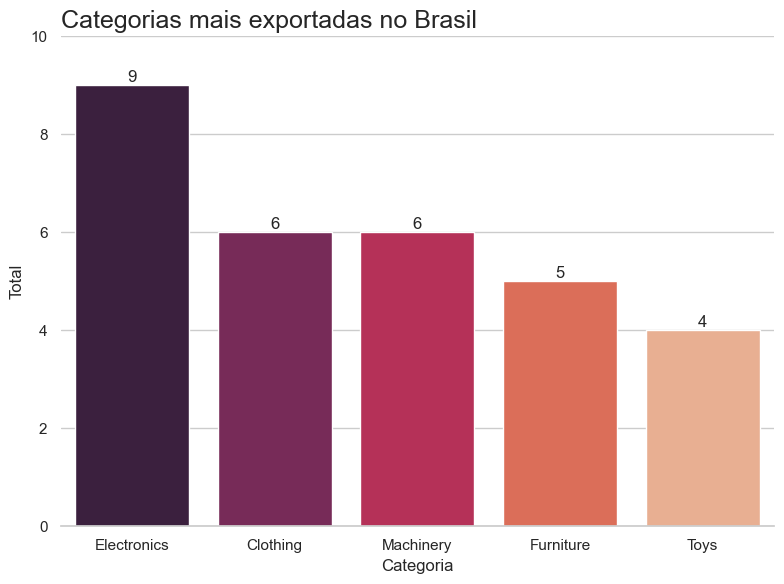

In [14]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data = new_data_brazil_export_category, x = 'Category', y = 'count', palette='rocket', hue='Category', ax=ax)

ax.set_xlabel("Categoria")
ax.set_ylabel("Total")
ax.set_title('Categorias mais exportadas no Brasil', fontsize=18, loc='left')

ax.set_ylim(0, 10)

# Adicionando rótulos nas barras
for container in ax.containers:
    ax.bar_label(container)
    
sns.despine(left=True, right=True)

f.tight_layout()

plt.savefig('graficos/categorias_mais_exportadas_brasil.png')

plt.show()

No gráfico acima é possível perceber que o Brasil faz muito envio de eletrônicos, o que pode ser algo chamativo, já que o Brasil não é conhecido pela suas indústrias de eletrônico, mas como um país de produção agrária, por exemplo.

### Quais são os países que mais ganham com exportação?

Nesta etapa, será analisado os países que mais tem lucro com exportação.

In [15]:
data

Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                Port     Category  \
0            Export             Air          Robertbury    Machinery   
1            Export             Air            Shahport     Clothing   
2            Export             Air            Adamfort    Furniture   
3            Export             Air           Juliebury  Electronics   
4            Export             Sea        East Randall    Machinery   
...             ...             ...                 ...          ...   
14995        Import            Land           Henryberg  Electronics   
14996        Import             Air           Tracyview    Furniture   
14997        Import             Sea     North Juliatown  Electronics   
14998        Import            Land  North Kathleentown     Clothing   
14999        Import             Air           West Gary     Clothing   

       Quantity    Value       Date  Customs_Code   Weight  
0          1979  9506.57 2023-12-07        620537  4248.65  
1          5763  7100.91 2023-04-04        927600  4340.81  
2          2592  7226.42 2022-05-09        996084  4886.14  
3          2622  2817.29 2023-04-03        555981  4406.74  
4          6975   657.80 2021-07-23        741778  1497.16  
...         ...      ...        ...           ...      ...  
14995      3115  9263.96 2022-05-07        570345   541.97  
14996      2885  4114.55 2023-02-20        946363  2147.70  
14997      7090  9043.26 2020-06-01        282403  3300.82  
14998      2016  4572.23 2020-11-07        855213  2559.71  
14999      5635   561.33 2019-12-25        766709  2913.82  

[15000 rows x 12 columns]

In [16]:
data_paises_exportacao = data[['Country', 'Value', 'Import_Export']]

new_data_paises_exportacao = data_paises_exportacao.query('Import_Export == "Export"')
new_data_paises_exportacao_not_duplicate = new_data_paises_exportacao.groupby('Country',as_index=False)['Value'].sum()

new_data_paises_exportacao_not_duplicate = new_data_paises_exportacao_not_duplicate.sort_values(by='Value', ascending=False)
top_5_exportacao = new_data_paises_exportacao_not_duplicate.head()
top_5_exportacao

Country      Value
49           Congo  327797.57
114          Korea  307474.28
52   Cote d'Ivoire  268524.99
105         Israel  241688.71
97         Hungary  237536.87

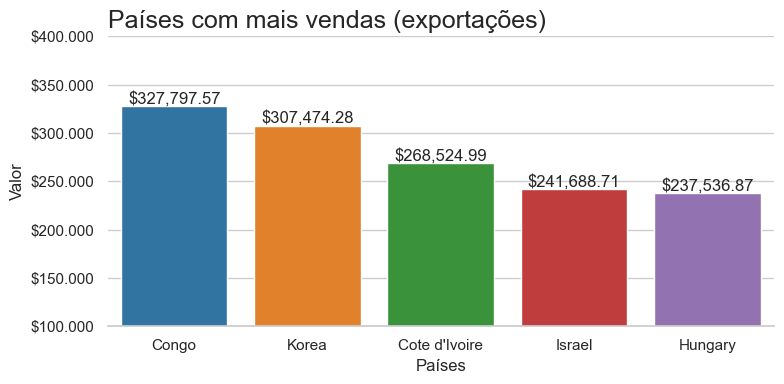

In [17]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data = top_5_exportacao, x = 'Country', y = 'Value', palette='tab10', hue='Country', ax=ax)

ax.set_xlabel("Países")
ax.set_ylabel("Valor")
ax.set_title('Países com mais vendas (exportações)', fontsize=18, loc='left')

ax.set_ylim(100000, 400000)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.3f}'.format(x / 1000)))

# Adicionando rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.2f}')
    
sns.despine(left=True, right=True)

f.tight_layout()

plt.savefig('graficos/paises_que_com_mais_valor_exportacao.png')

plt.show()

O gráfico mostra que o Congo e a Corea, são os dois países que mais exportam com um valor acima de 300.000 doláres em vendas

### Quais são os meios mais usados de envio?

Nesta etapa, será analisado e mostrado, por meio de gráficos, quais são os meios de transporte mais usados para importação e exportação de produtos.

In [18]:
data_meios_de_envio = data[['Country', 'Shipping_Method', 'Port', 'Category', 'Import_Export']]
value_counts_data_meios_de_envio = data_meios_de_envio['Shipping_Method'].value_counts().reset_index()
value_counts_data_meios_de_envio.rename(columns={'count': 'Total'}, inplace=True)

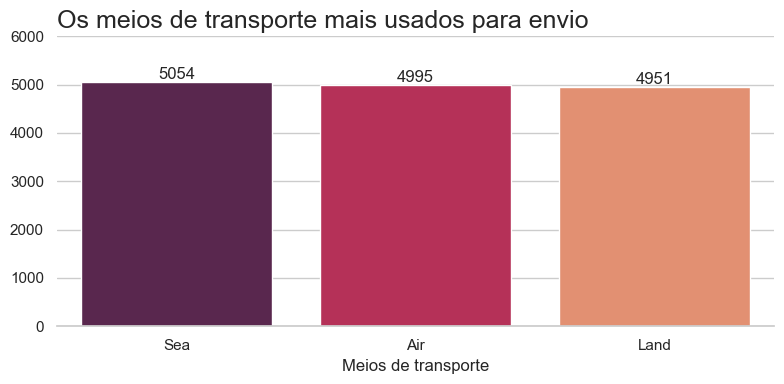

In [19]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data=value_counts_data_meios_de_envio, 
                x='Shipping_Method', 
                y='Total', 
                palette='rocket', 
                hue='Shipping_Method', 
                ax=ax)

ax.set_title('Os meios de transporte mais usados para envio', fontsize=18, loc='left')
ax.set_xlabel('Meios de transporte')
ax.set_ylabel('')

# Definindo os limites do eixo y
ax.set_ylim(0, 6000)

# Adicionando rótulos nas barras
for container in ax.containers:
    ax.bar_label(container)

sns.despine(left=True, right=True)

f.tight_layout()

plt.savefig('graficos/meio_transporte_mais_usado_envio.png')
plt.show()

É possível perceber pelo gráfico, que todos os meios de transporte, aparecem em quantidade iguais com média de 5 mil. Ou seja, não existe um meio mais usado, ou mais utilizado pelos países para comércio de produtos nas importações e exportações.

### As datas são um influência na importação e na exportação?

Nesta etapa, será analisado se as datas tem alguma influência no aumento ou diminuição de importação e exportação.

In [20]:
data

Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                Port     Category  \
0            Export             Air          Robertbury    Machinery   
1            Export             Air            Shahport     Clothing   
2            Export             Air            Adamfort    Furniture   
3            Export             Air           Juliebury  Electronics   
4            Export             Sea        East Randall    Machinery   
...             ...             ...                 ...          ...   
14995        Import            Land           Henryberg  Electronics   
14996        Import             Air           Tracyview    Furniture   
14997        Import             Sea     North Juliatown  Electronics   
14998        Import            Land  North Kathleentown     Clothing   
14999        Import             Air           West Gary     Clothing   

       Quantity    Value       Date  Customs_Code   Weight  
0          1979  9506.57 2023-12-07        620537  4248.65  
1          5763  7100.91 2023-04-04        927600  4340.81  
2          2592  7226.42 2022-05-09        996084  4886.14  
3          2622  2817.29 2023-04-03        555981  4406.74  
4          6975   657.80 2021-07-23        741778  1497.16  
...         ...      ...        ...           ...      ...  
14995      3115  9263.96 2022-05-07        570345   541.97  
14996      2885  4114.55 2023-02-20        946363  2147.70  
14997      7090  9043.26 2020-06-01        282403  3300.82  
14998      2016  4572.23 2020-11-07        855213  2559.71  
14999      5635   561.33 2019-12-25        766709  2913.82  

[15000 rows x 12 columns]

#### Analisando as importações por ano

Análise das importações que foram feitas por ano, para que seja verificado os anos determinam a queda ou a elevação das importações mundialmente

In [21]:
data_date_import = data.query('Import_Export == "Import"')

In [22]:
new_data_date_import = data_date_import[['Date', 'Import_Export']]
group_dates_import = new_data_date_import.value_counts()
new_group_dates_import = group_dates_import.reset_index().sort_values(by='Date', ascending=False)
new_group_dates_import

new_group_dates_import['year'] = new_group_dates_import['Date'].dt.year
new_group_dates_import['month'] = new_group_dates_import['Date'].dt.month

group_by_year_import = new_group_dates_import.groupby('year',as_index=False)['count'].sum()
group_by_month_import = new_group_dates_import.groupby('month',as_index=False)['count'].sum()
group_by_month_import

month  count
0       1    658
1       2    597
2       3    668
3       4    582
4       5    636
5       6    592
6       7    640
7       8    665
8       9    652
9      10    638
10     11    589
11     12    652

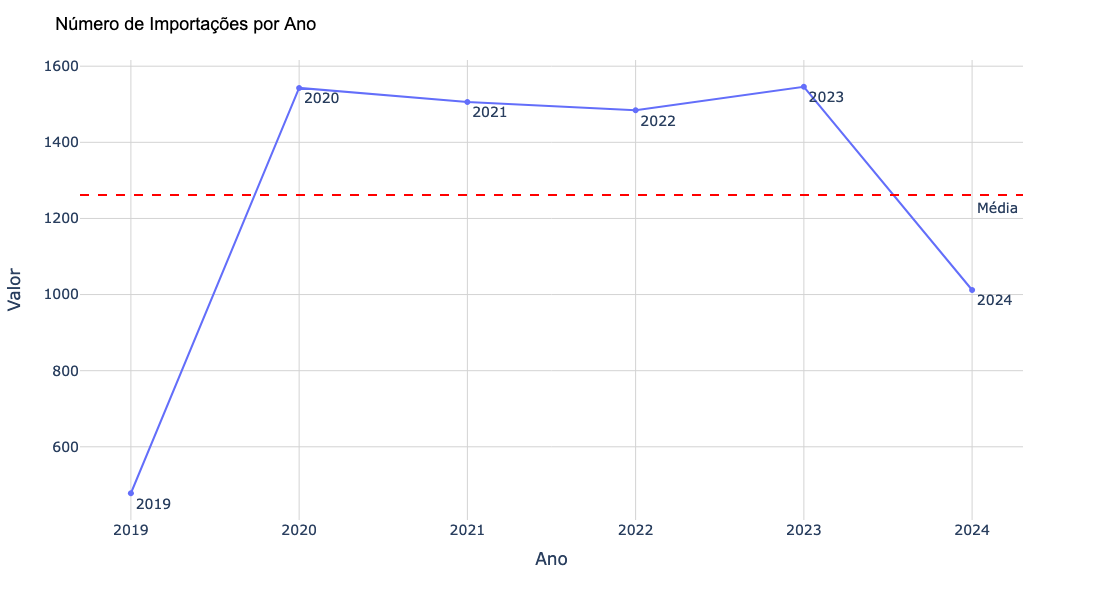

In [23]:
import plotly.express as px

# Criação do gráfico
fig = px.line(group_by_year_import, x="year", y="count", text='year', markers=True)
fig.update_traces(textposition="bottom right")

# Melhorias no layout
fig.update_layout(
    title="Número de Importações por Ano",
    title_font=dict(size=18, family="Arial, sans-serif", color='black'),
    xaxis_title="Ano",
    yaxis_title="Valor",
    font=dict(size=14),
    xaxis=dict(showgrid=True, zeroline=True, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, zeroline=True, gridcolor='LightGray'),
    plot_bgcolor='white',
    legend=dict(title_text='Legenda', title_font=dict(size=14)),
    height=600  # Aumenta a altura do gráfico para 600 pixels
)

# Adicionar uma linha média
fig.add_hline(y=group_by_year_import['count'].mean(), line_dash="dash", line_color="red", 
               annotation_text="Média", annotation_position="bottom right")

# Salvar e mostrar o gráfico
plotly.offline.plot(fig, filename='graficos/numero_importacoes_ano.html')
fig.show()

É possível perceber pelo gráfico que o número de importações cresceu durante o período da pandemia (2020-2022) e teve uma queda no números em 2024

#### Analisando as importações por meses

Está é uma análise para verificar as exportações e importações feitas em cada um dos meses do ano.

In [24]:
group_by_month_import

month  count
0       1    658
1       2    597
2       3    668
3       4    582
4       5    636
5       6    592
6       7    640
7       8    665
8       9    652
9      10    638
10     11    589
11     12    652

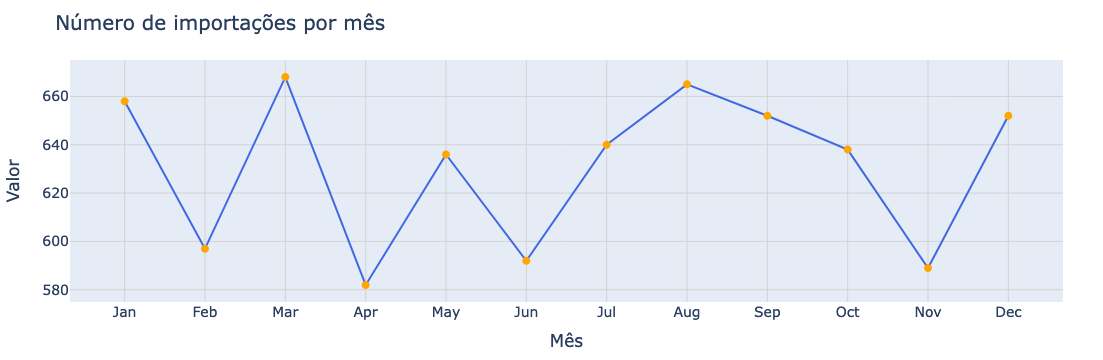

In [25]:
# Mapeando os números dos meses para suas abreviações
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Criando uma nova coluna com as abreviações dos meses
group_by_month_import['month_abbrev'] = group_by_month_import['month'].map(month_map)

# Criando o gráfico com as abreviações dos meses
fig = px.line(
    group_by_month_import,
    x="month_abbrev",  # Usando a nova coluna
    y="count",
    markers=True,  # Adiciona marcadores nos pontos
    hover_name='month_abbrev',  # Mostra o mês no hover
    hover_data={'count': True}  # Exibe o total
)

# Atualizando as propriedades das linhas
fig.update_traces(
    textposition="bottom right",
    line=dict(width=2, color='royalblue'),  # Cor e espessura da linha
    marker=dict(size=8, color='orange'),  # Estilo dos marcadores
)

# Atualizando o layout
fig.update_layout(
    title="Número de importações por mês",
    xaxis_title="Mês",
    yaxis_title="Valor",
    font=dict(size=14),
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  # Linhas de grade
    yaxis=dict(showgrid=True, gridcolor='LightGray'),
    margin=dict(l=40, r=40, t=60, b=40),  # Margens do gráfico
    hovermode='x unified'  # Modo de hover
)

# Ajustando as informações exibidas no hover
for trace in fig.data:
    trace.hovertemplate = 'Mês: %{hovertext}<br>Total: %{y}<extra></extra>'

# Salvando e mostrando o gráfico
pyo.plot(fig, filename='graficos/numero_importacoes_mes.html')
fig.show()

É possível perceber pelo gráfico, que não existe uma conclusão para determinar se o mês do ano, pode ou não, interferir no aumento ou diminuição das importações. Já que o valores são bem parecidos ficando acima ou na margem de 600.

### Quanto que os países gastam com importação?

Nesta etapa, será analisada quanto que os principais países gastam com importação de produtos.

In [26]:
data

Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                Port     Category  \
0            Export             Air          Robertbury    Machinery   
1            Export             Air            Shahport     Clothing   
2            Export             Air            Adamfort    Furniture   
3            Export             Air           Juliebury  Electronics   
4            Export             Sea        East Randall    Machinery   
...             ...             ...                 ...          ...   
14995        Import            Land           Henryberg  Electronics   
14996        Import             Air           Tracyview    Furniture   
14997        Import             Sea     North Juliatown  Electronics   
14998        Import            Land  North Kathleentown     Clothing   
14999        Import             Air           West Gary     Clothing   

       Quantity    Value       Date  Customs_Code   Weight  
0          1979  9506.57 2023-12-07        620537  4248.65  
1          5763  7100.91 2023-04-04        927600  4340.81  
2          2592  7226.42 2022-05-09        996084  4886.14  
3          2622  2817.29 2023-04-03        555981  4406.74  
4          6975   657.80 2021-07-23        741778  1497.16  
...         ...      ...        ...           ...      ...  
14995      3115  9263.96 2022-05-07        570345   541.97  
14996      2885  4114.55 2023-02-20        946363  2147.70  
14997      7090  9043.26 2020-06-01        282403  3300.82  
14998      2016  4572.23 2020-11-07        855213  2559.71  
14999      5635   561.33 2019-12-25        766709  2913.82  

[15000 rows x 12 columns]

In [27]:
data_paises_importacao = data[['Country', 'Value', 'Import_Export']]

new_data_paises_importacao = data_paises_importacao.query('Import_Export == "Import"')
new_data_paises_importacao_not_duplicate = new_data_paises_importacao.groupby('Country',as_index=False)['Value'].sum()

new_data_paises_importacao_not_duplicate = new_data_paises_importacao_not_duplicate.sort_values(by='Value', ascending=False)
top_5_importacao = new_data_paises_importacao_not_duplicate.head()
top_5_importacao

Country      Value
49         Congo  350065.04
164     Pakistan  245109.86
210  Switzerland  232599.06
154  New Zealand  232026.60
77        Gambia  221836.87

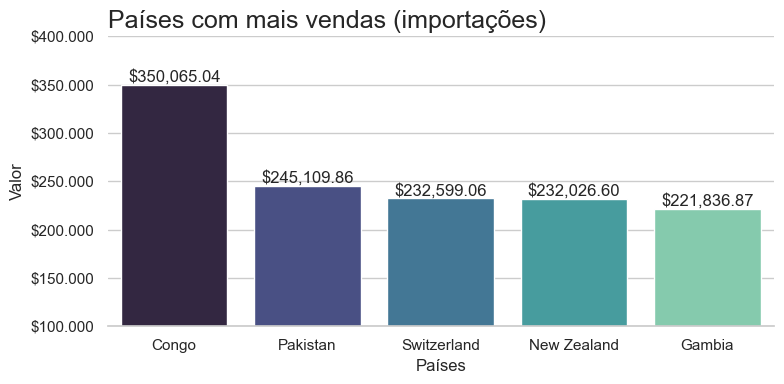

In [28]:
# Defina seu tema
sns.set_theme(style="whitegrid")

# Criação da figura e do eixo
f, ax = plt.subplots(figsize=(8, 4))

# Gráfico de barras
sns.barplot(data=top_5_importacao, x='Country', y='Value', palette='mako', ax=ax, hue='Country')

# Configurações dos rótulos dos eixos
ax.set_xlabel("Países")
ax.set_ylabel("Valor")
ax.set_title('Países com mais vendas (importações)', fontsize=18, loc='left')

# Definindo os limites do eixo y
ax.set_ylim(100000, 400000)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.3f}'.format(x / 1000)))

# Adicionando rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.2f}')

# Removendo as bordas laterais
sns.despine(left=True, right=True)

# Ajuste o layout
f.tight_layout()

# Salvar o gráfico
plt.savefig('graficos/paises_que_com_mais_valor_importacao.png')
plt.show()

Os países que mais exportam são, por exemplo, o Congo novamente que gastou <b>$350.065</b> com importações, seguido do Paquistão e Suíça, que tem gastos bem menores se comparados com o primeiro.

### Quais são os 5 países com mais quantidade de produtos importados?

Nessa etapa, será analisada quais são os primeiro 5 países com mais quantidade de produtos importados.

In [29]:
data

Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                Port     Category  \
0            Export             Air          Robertbury    Machinery   
1            Export             Air            Shahport     Clothing   
2            Export             Air            Adamfort    Furniture   
3            Export             Air           Juliebury  Electronics   
4            Export             Sea        East Randall    Machinery   
...             ...             ...                 ...          ...   
14995        Import            Land           Henryberg  Electronics   
14996        Import             Air           Tracyview    Furniture   
14997        Import             Sea     North Juliatown  Electronics   
14998        Import            Land  North Kathleentown     Clothing   
14999        Import             Air           West Gary     Clothing   

       Quantity    Value       Date  Customs_Code   Weight  
0          1979  9506.57 2023-12-07        620537  4248.65  
1          5763  7100.91 2023-04-04        927600  4340.81  
2          2592  7226.42 2022-05-09        996084  4886.14  
3          2622  2817.29 2023-04-03        555981  4406.74  
4          6975   657.80 2021-07-23        741778  1497.16  
...         ...      ...        ...           ...      ...  
14995      3115  9263.96 2022-05-07        570345   541.97  
14996      2885  4114.55 2023-02-20        946363  2147.70  
14997      7090  9043.26 2020-06-01        282403  3300.82  
14998      2016  4572.23 2020-11-07        855213  2559.71  
14999      5635   561.33 2019-12-25        766709  2913.82  

[15000 rows x 12 columns]

In [30]:
data_quantity_import = data[['Country', 'Quantity', 'Import_Export']]
data_quantity_import_query = data_quantity_import.query('Import_Export == "Import"')

new_data_quantity_import = data_quantity_import_query.groupby('Country',as_index=False)['Quantity'].sum()

new_data_quantity_not_duplicate_import = new_data_quantity_import.sort_values(by='Quantity', ascending=False)
most_quantity_imported_items_by_country = new_data_quantity_not_duplicate_import.head()
most_quantity_imported_items_by_country

Country  Quantity
49                              Congo    349825
75        French Southern Territories    244804
84                            Grenada    234400
117  Lao People's Democratic Republic    227676
164                          Pakistan    223391

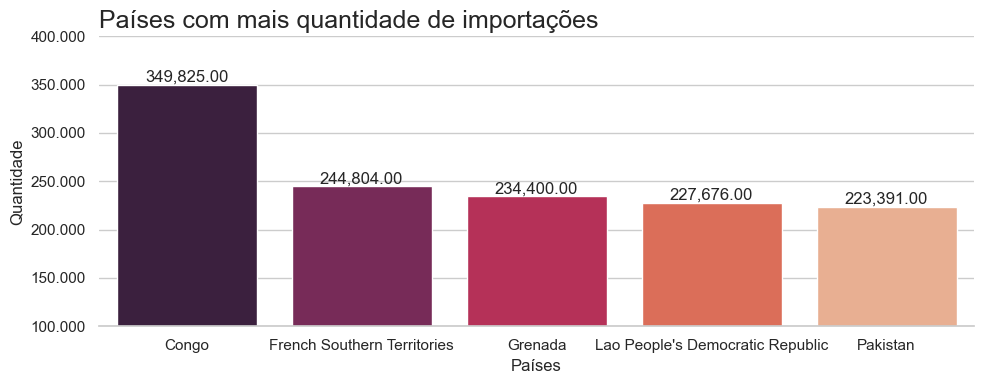

In [31]:
# Configuração do estilo do gráfico
sns.set_theme(style="whitegrid")

# Criação da figura e dos eixos
f, ax = plt.subplots(figsize=(10, 4))

# Criação do gráfico de barras com a coluna 'Country' no hue
sns.barplot(
    data=most_quantity_imported_items_by_country,
    x='Country',
    y='Quantity',
    hue='Country', 
    palette='rocket',
    ax=ax
)

# Configuração dos rótulos e do título do gráfico
ax.set_xlabel("Países")
ax.set_ylabel("Quantidade")
ax.set_title('Países com mais quantidade de importações', fontsize=18, loc='left')

# Definindo o limite do eixo y
ax.set_ylim(100000, 400000)

# Definindo os ticks do eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.3f}'.format(x / 1000)))

# Adicionando rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}')

# Removendo bordas laterais do gráfico
sns.despine(left=True, right=True)

f.tight_layout()

# Salvando e exibindo o gráfico
plt.savefig('graficos/paises_que_mais_importacao_por_quantidade.png')
plt.show()

É possível perceber que, o Congo é o país com mais quantidade de produtos importados, com uma margem perto de <strong>350.000<strong>, enquanto, por exemplo, os territórios do sudeste Francês tem quase <strong>250.000</strong>

### Quais são os 5 países com mais quantidade de produtos exportados?

In [32]:
data_quantity_export = data[['Country', 'Quantity', 'Import_Export']]
data_quantity_export_query = data_quantity_export.query('Import_Export == "Export"')

new_data_quantity_export = data_quantity_export_query.groupby('Country',as_index=False)['Quantity'].sum()

new_data_quantity_not_duplicate_export = new_data_quantity_export.sort_values(by='Quantity', ascending=False)
most_quantity_export_items_by_country = new_data_quantity_not_duplicate_export.head()
most_quantity_export_items_by_country

Country  Quantity
114             Korea    358595
49              Congo    313821
172  Pitcairn Islands    240365
237           Vietnam    237008
73      French Guiana    222984

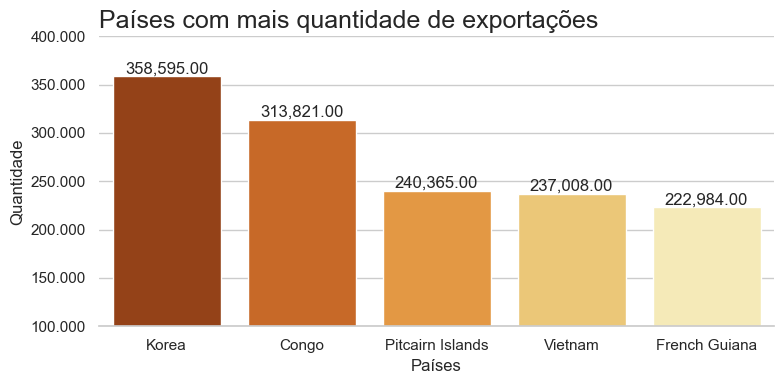

In [33]:

# Configuração do estilo
sns.set_theme(style="whitegrid")

# Configuração do gráfico
f, ax = plt.subplots(figsize=(8, 4))

# Gráfico de barras
sns.barplot(data=most_quantity_export_items_by_country,
            x='Country', 
            y='Quantity', 
            palette='YlOrBr_r', 
            hue='Country', 
            ax=ax)

# Definições de rótulos e título
ax.set_xlabel("Países")
ax.set_ylabel("Quantidade")
ax.set_title('Países com mais quantidade de exportações', fontsize=18, loc='left')

# Ajuste dos limites do eixo y
ax.set_ylim(100000, 400000)

# Formatação do eixo y para exibir valores em milhares (K)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.3f}'.format(x / 1000)))

# Etiquetas das barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}')

# Remover as bordas
sns.despine(left=True, right=True)

f.tight_layout()

# Salvar e exibir o gráfico
plt.savefig('graficos/paises_que_mais_exportacao_por_quantidade.png')
plt.show()

Os países que mais exportam produtos são a Corea, com um quantidade proxima de <strong>360.000</strong>, em seguida novamente o Congo com um quantidade de <strong>313.000</strong>.

### Quais são as categorias mais importadas pelos países?

Análise dos dados para saber quais são as categorias mais importadas por todos os países que se encontram na tabela

In [34]:
data

Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                Port     Category  \
0            Export             Air          Robertbury    Machinery   
1            Export             Air            Shahport     Clothing   
2            Export             Air            Adamfort    Furniture   
3            Export             Air           Juliebury  Electronics   
4            Export             Sea        East Randall    Machinery   
...             ...             ...                 ...          ...   
14995        Import            Land           Henryberg  Electronics   
14996        Import             Air           Tracyview    Furniture   
14997        Import             Sea     North Juliatown  Electronics   
14998        Import            Land  North Kathleentown     Clothing   
14999        Import             Air           West Gary     Clothing   

       Quantity    Value       Date  Customs_Code   Weight  
0          1979  9506.57 2023-12-07        620537  4248.65  
1          5763  7100.91 2023-04-04        927600  4340.81  
2          2592  7226.42 2022-05-09        996084  4886.14  
3          2622  2817.29 2023-04-03        555981  4406.74  
4          6975   657.80 2021-07-23        741778  1497.16  
...         ...      ...        ...           ...      ...  
14995      3115  9263.96 2022-05-07        570345   541.97  
14996      2885  4114.55 2023-02-20        946363  2147.70  
14997      7090  9043.26 2020-06-01        282403  3300.82  
14998      2016  4572.23 2020-11-07        855213  2559.71  
14999      5635   561.33 2019-12-25        766709  2913.82  

[15000 rows x 12 columns]

In [35]:
country_most_import_categorys = data[['Country', 'Import_Export', 'Category', 'Quantity']]
country_most_import_categorys

Country Import_Export     Category  Quantity
0                 Colombia        Export    Machinery      1979
1                    Chile        Export     Clothing      5763
2         Christmas Island        Export    Furniture      2592
3                  Finland        Export  Electronics      2622
4              New Zealand        Export    Machinery      6975
...                    ...           ...          ...       ...
14995             Anguilla        Import  Electronics      3115
14996  Antigua and Barbuda        Import    Furniture      2885
14997           Luxembourg        Import  Electronics      7090
14998                Congo        Import     Clothing      2016
14999      North Macedonia        Import     Clothing      5635

[15000 rows x 4 columns]

In [36]:
country_most_import_categorys_only = country_most_import_categorys.query('Import_Export == "Import"')

In [37]:
sum_categorys_import_quantity = country_most_import_categorys_only.groupby('Category',as_index=False)['Quantity'].sum()

new_sum_categorys_import_quantity = sum_categorys_import_quantity.sort_values(by='Quantity', ascending=False)
most_imported_products_by_country = new_sum_categorys_import_quantity.head()
most_imported_products_by_country

Category  Quantity
0     Clothing   7774709
3    Machinery   7743310
2    Furniture   7670318
1  Electronics   7443348
4         Toys   7208331

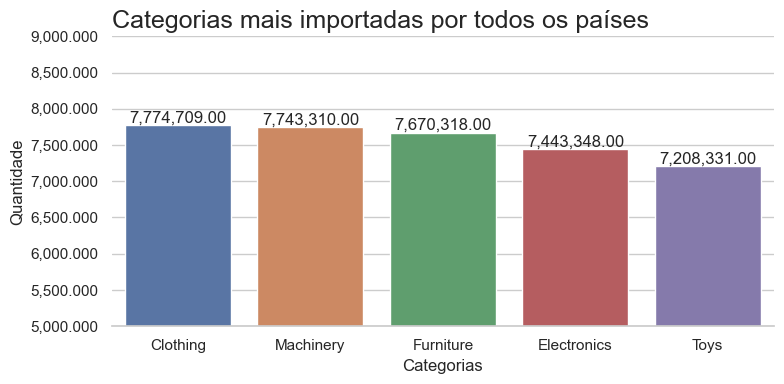

In [38]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

ax.set_title('Categorias mais importadas por todos os países', fontsize=18, loc='left')
ax.set_xlabel('Categorias')
ax.set_ylabel('Quantidade')

sns.barplot(x="Category", y="Quantity", data=most_imported_products_by_country, hue='Category')

# Ajuste dos limites do eixo y
ax.set_ylim(5000000, 9000000)

# Formatação do eixo y para exibir valores em milhares (K)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.3f}'.format(x / 1000)))

# Etiquetas das barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}')

f.tight_layout()

sns.despine(left=True, right=True)

plt.savefig('graficos/categorias_mais_importadas_por_todos_paises.png')
plt.show()

É possível perceber que as categorias mais importadas são roupas e máquinas, enquanto brinquedos são os últimos da lista

### Quais são as categorias mais exportadas pelos países?

Nesta etapa, será analisada quais são as categorias mais exportadas pelos países.

In [39]:
country_most_export_categorys = data[['Country', 'Import_Export', 'Category', 'Quantity']]
country_most_export_categorys

Country Import_Export     Category  Quantity
0                 Colombia        Export    Machinery      1979
1                    Chile        Export     Clothing      5763
2         Christmas Island        Export    Furniture      2592
3                  Finland        Export  Electronics      2622
4              New Zealand        Export    Machinery      6975
...                    ...           ...          ...       ...
14995             Anguilla        Import  Electronics      3115
14996  Antigua and Barbuda        Import    Furniture      2885
14997           Luxembourg        Import  Electronics      7090
14998                Congo        Import     Clothing      2016
14999      North Macedonia        Import     Clothing      5635

[15000 rows x 4 columns]

In [40]:
sum_categorys_export_quantity = country_most_export_categorys.groupby('Category',as_index=False)['Quantity'].sum()

new_sum_categorys_export_quantity = sum_categorys_export_quantity.sort_values(by='Quantity', ascending=False)
most_exported_products_by_country = new_sum_categorys_export_quantity.head()
most_exported_products_by_country

Category  Quantity
0     Clothing  15316103
1  Electronics  15053498
3    Machinery  14990568
2    Furniture  14964316
4         Toys  14383836

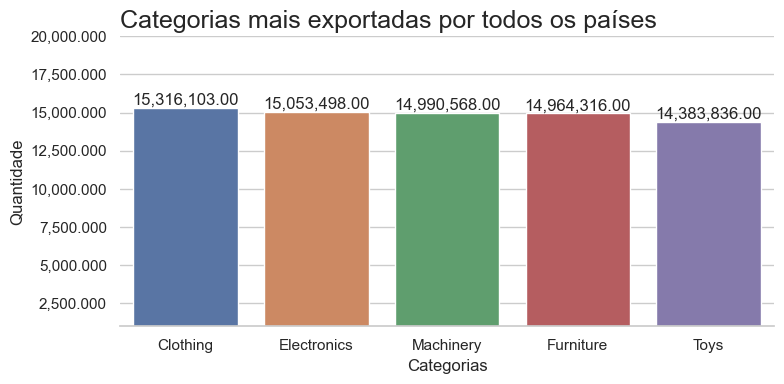

In [41]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

ax.set_title('Categorias mais exportadas por todos os países', fontsize=18, loc='left')
ax.set_xlabel('Categorias')
ax.set_ylabel('Quantidade')

sns.barplot(x="Category", y="Quantity", data=most_exported_products_by_country, hue='Category')

# Ajuste dos limites do eixo y
ax.set_ylim(1000000, 20000000)

# Formatação do eixo y para exibir valores em milhares (K)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.3f}'.format(x / 1000)))

# Etiquetas das barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}')

f.tight_layout()

sns.despine(left=True, right=True)

plt.savefig('graficos/categorias_mais_exportadas_por_todos_os_paises.png')
plt.show()

Os produtos mais exportados pelo países são roupas e eletrônicos e mais um vez é possível perceber que brinquedos são os que aparecem em menos quantidade

### Quais são os produtos mais exportados e importados pelo Congo?

Já que o Congo apareceu duas vezes no Top 1 de país que mais exporta e importa produtos, vamos dar uma analisada, para ver o que mais é exportado e importado dentro do país

In [42]:
data

Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                Port     Category  \
0            Export             Air          Robertbury    Machinery   
1            Export             Air            Shahport     Clothing   
2            Export             Air            Adamfort    Furniture   
3            Export             Air           Juliebury  Electronics   
4            Export             Sea        East Randall    Machinery   
...             ...             ...                 ...          ...   
14995        Import            Land           Henryberg  Electronics   
14996        Import             Air           Tracyview    Furniture   
14997        Import             Sea     North Juliatown  Electronics   
14998        Import            Land  North Kathleentown     Clothing   
14999        Import             Air           West Gary     Clothing   

       Quantity    Value       Date  Customs_Code   Weight  
0          1979  9506.57 2023-12-07        620537  4248.65  
1          5763  7100.91 2023-04-04        927600  4340.81  
2          2592  7226.42 2022-05-09        996084  4886.14  
3          2622  2817.29 2023-04-03        555981  4406.74  
4          6975   657.80 2021-07-23        741778  1497.16  
...         ...      ...        ...           ...      ...  
14995      3115  9263.96 2022-05-07        570345   541.97  
14996      2885  4114.55 2023-02-20        946363  2147.70  
14997      7090  9043.26 2020-06-01        282403  3300.82  
14998      2016  4572.23 2020-11-07        855213  2559.71  
14999      5635   561.33 2019-12-25        766709  2913.82  

[15000 rows x 12 columns]

### Categorias mais importadas pelo Congo

Quais são as categorias mais exportadas pelo Congo.

In [43]:
data_congo_export = data.query('Country == "Congo" and Import_Export == "Export"')

In [44]:
new_data_congo_export = data_congo_export[['Category', 'Quantity']]

In [45]:
sum_data_congo_quantity_category_export = new_data_congo_export.groupby('Category',as_index=False)['Quantity'].sum()

new_sum_data_congo_quantity_category_export = sum_data_congo_quantity_category_export.sort_values(by='Quantity', ascending=False)
most_export_categorys_congo = new_sum_data_congo_quantity_category_export
most_export_categorys_congo

Category  Quantity
1  Electronics     94765
2    Furniture     81115
3    Machinery     62145
0     Clothing     45800
4         Toys     29996

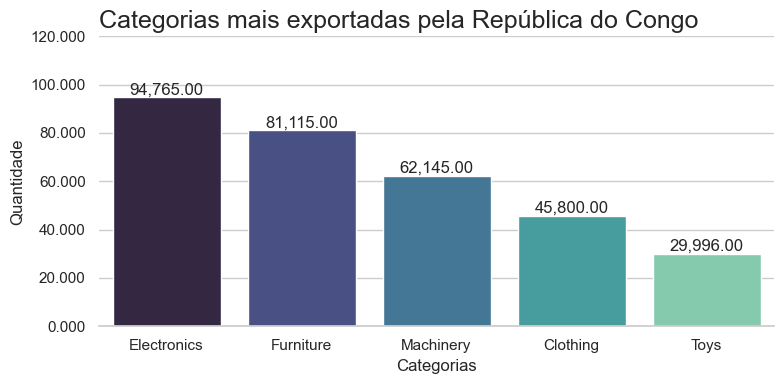

In [46]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

ax.set_title('Categorias mais exportadas pela República do Congo', fontsize=18, loc='left')
ax.set_xlabel('Categorias')
ax.set_ylabel('Quantidade')

sns.barplot(x="Category", y="Quantity", data=most_export_categorys_congo, hue='Category', palette='mako')

# Ajuste dos limites do eixo y
ax.set_ylim(0, 120000)

# Formatação do eixo y para exibir valores em milhares (K)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.3f}'.format(x / 1000)))

# Etiquetas das barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}')

f.tight_layout()

sns.despine(left=True, right=True)

plt.savefig('graficos/categorias_mais_exportadas_republica_congo.png')
plt.show()

É possível perceber que o Congo exporta muitos eletrônicos, o que mesmo sem informações, é possível concluir que existem indústrias terceirazadas que produzem para grandes empresas para fora do país, por exemplo.

### Categorias mais importadas pelo Congo

Quais são as categorias mais importadas pelo Congo.

In [47]:
data_congo_import = data.query('Country == "Congo" and Import_Export == "Import"')

In [48]:
new_data_congo_import = data_congo_import[['Category', 'Quantity']]

In [49]:
sum_data_congo_quantity_category_import = new_data_congo_import.groupby('Category',as_index=False)['Quantity'].sum()

new_sum_data_congo_quantity_category_import = sum_data_congo_quantity_category_import.sort_values(by='Quantity', ascending=False)
most_import_categorys_congo = new_sum_data_congo_quantity_category_import
most_import_categorys_congo

Category  Quantity
3    Machinery    105235
0     Clothing     91680
2    Furniture     60365
4         Toys     53809
1  Electronics     38736

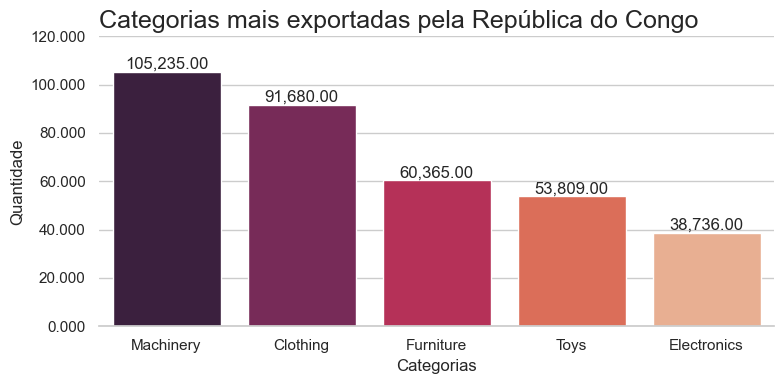

In [50]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

ax.set_title('Categorias mais exportadas pela República do Congo', fontsize=18, loc='left')
ax.set_xlabel('Categorias')
ax.set_ylabel('Quantidade')

sns.barplot(x="Category", y="Quantity", data=most_import_categorys_congo, hue='Category', palette='rocket')

# Ajuste dos limites do eixo y
ax.set_ylim(0, 120000)

# Formatação do eixo y para exibir valores em milhares (K)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.3f}'.format(x / 1000)))

# Etiquetas das barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}')

f.tight_layout()

sns.despine(left=True, right=True)

plt.savefig('graficos/categorias_mais_importadas_republica_congo.png')
plt.show()

É possível perceber que máquinas são os produtos mais exportados pelo Congo, algo bem curioso para um país do continente africano, que em sua maioria, são países subdesenvolvidos ou emergentes.

### Regressão Linear

In [51]:
data

Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                Port     Category  \
0            Export             Air          Robertbury    Machinery   
1            Export             Air            Shahport     Clothing   
2            Export             Air            Adamfort    Furniture   
3            Export             Air           Juliebury  Electronics   
4            Export             Sea        East Randall    Machinery   
...             ...             ...                 ...          ...   
14995        Import            Land           Henryberg  Electronics   
14996        Import             Air           Tracyview    Furniture   
14997        Import             Sea     North Juliatown  Electronics   
14998        Import            Land  North Kathleentown     Clothing   
14999        Import             Air           West Gary     Clothing   

       Quantity    Value       Date  Customs_Code   Weight  
0          1979  9506.57 2023-12-07        620537  4248.65  
1          5763  7100.91 2023-04-04        927600  4340.81  
2          2592  7226.42 2022-05-09        996084  4886.14  
3          2622  2817.29 2023-04-03        555981  4406.74  
4          6975   657.80 2021-07-23        741778  1497.16  
...         ...      ...        ...           ...      ...  
14995      3115  9263.96 2022-05-07        570345   541.97  
14996      2885  4114.55 2023-02-20        946363  2147.70  
14997      7090  9043.26 2020-06-01        282403  3300.82  
14998      2016  4572.23 2020-11-07        855213  2559.71  
14999      5635   561.33 2019-12-25        766709  2913.82  

[15000 rows x 12 columns]

In [77]:
quantidade = data['Quantity']
valor = data['Value']

X = quantidade.values.reshape(-1, 1)
y = valor.values.reshape(-1, 1)

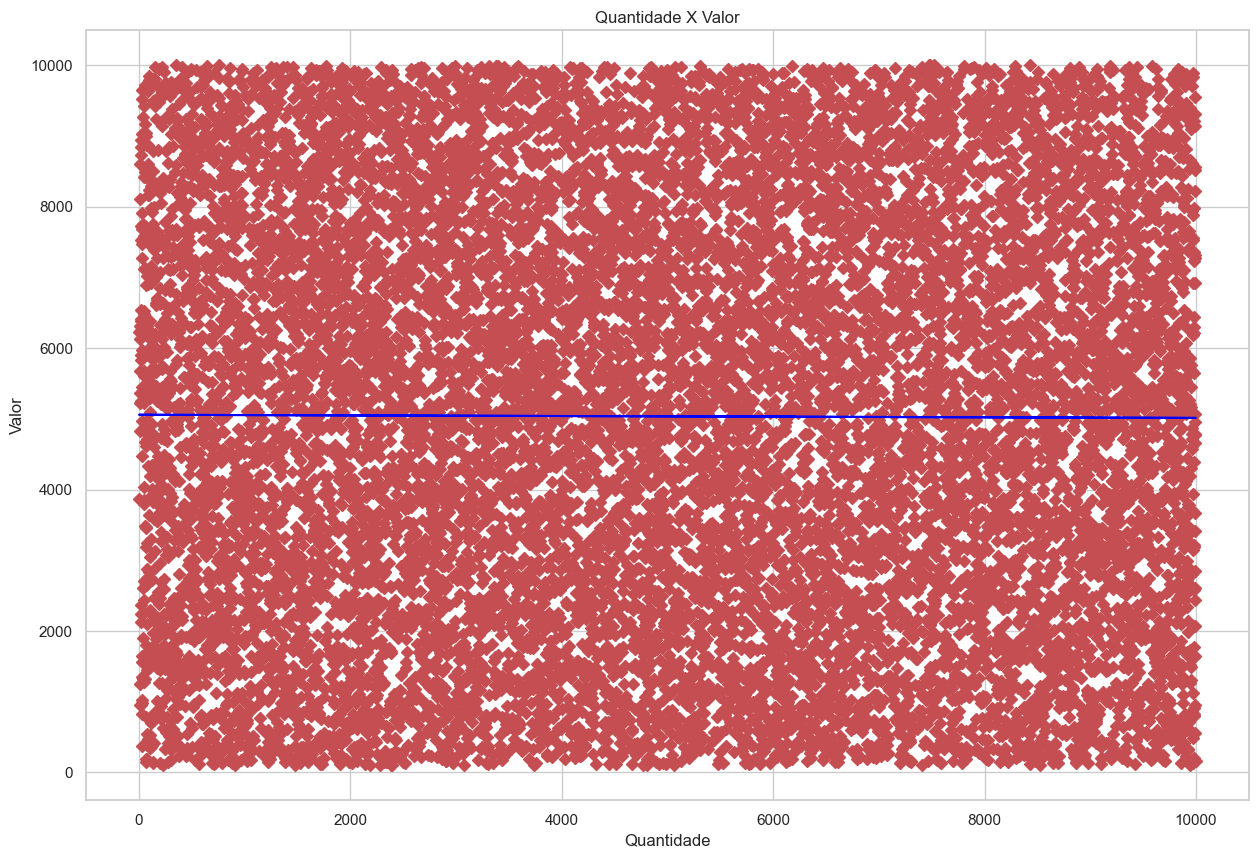

In [78]:
# Dividindo o dataset entre treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

# Ajustando o modelo de Regressão Linear para o dataset de treino
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Visualizar os resultados do treino
plt.figure(figsize=(15,10))

plt.plot(X, y, 'Dr')

plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Quantidade X Valor')
plt.xlabel('Quantidade')
plt.ylabel('Valor')

plt.show()

Pelo gráfico de regressão linear, é possível concluir que a quantidade de produtos e o seu valor, não tem algo em comum nesse contexto. Mesmo sendo algo lógico de que quanto mais produtos, maior o seu valor, mas esse exemplo não se aplica dentro desse contexto.

### Conclusão do Projeto

Assim, podemos observar que, embora muitos países realizem exportações e importações, alguns se destacam mais nesse cenário, como o Congo e a Coreia. O Brasil, por exemplo, é notável por exportar eletrônicos e importar máquinas. A análise de regressão linear realizada sugere que não há uma relação clara entre a quantidade de produtos e o valor de cada um deles. Além disso, os gráficos indicam que as datas não influenciam diretamente o aumento ou a diminuição das importações e exportações ao longo do tempo.